In [82]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
df = pd.read_csv('D:/projects/winequalityN.csv')
df.head()

### Filling missing values

In [84]:
df.isna().sum()

type                     0
fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64

In [85]:
df = df.fillna(df.median().iloc[0])
df

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,white,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,white,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,red,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
6493,red,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,7.00,11.2,6
6494,red,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
6495,red,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


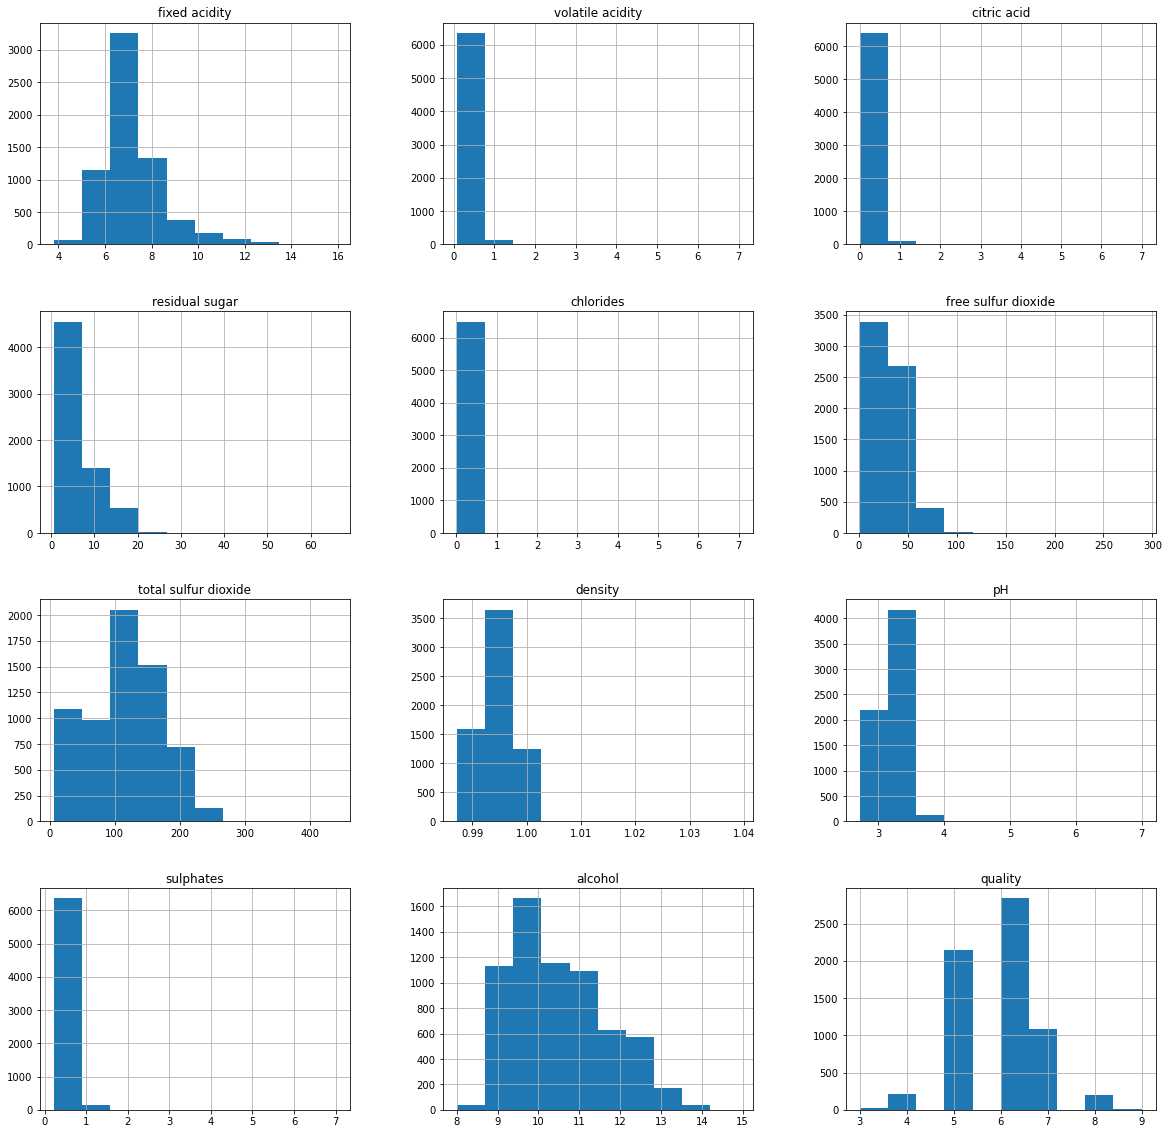

In [87]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

df.hist(bins=10, figsize=(20,20))
plt.show()

### Finding Correlation

<AxesSubplot:>

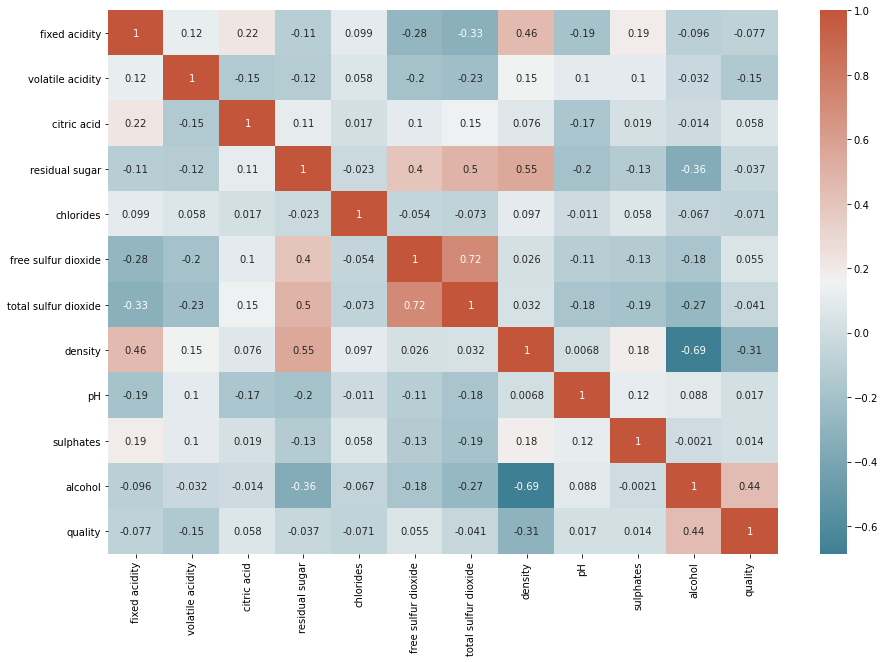

In [24]:
import seaborn as sns
plt.subplots(figsize=(15,10))
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True))

In [88]:
corr_matrix = df.corr()
corr_matrix['quality'].sort_values(ascending=False)

quality                 1.000000
alcohol                 0.444319
citric acid             0.058326
free sulfur dioxide     0.055463
pH                      0.016544
sulphates               0.014471
residual sugar         -0.036740
total sulfur dioxide   -0.041385
chlorides              -0.071303
fixed acidity          -0.076931
volatile acidity       -0.147124
density                -0.305858
Name: quality, dtype: float64

In [89]:
#Strong correlation between quality, alcohol, density

In [108]:
df_copy = df.copy()

In [109]:
df_copy.drop(['sulphates','pH','total sulfur dioxide','residual sugar'], axis = 1, inplace = True)
df.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,goodquality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,0
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,0
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,0
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,0
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,0


### Classifying quality >= 7 as good

In [90]:
df['goodquality'] = [1 if x >= 7 else 0 for x in df['quality']]
df['goodquality'].value_counts()

0    5220
1    1277
Name: goodquality, dtype: int64

### Label Encoding for wine type

In [91]:
dummy = pd.get_dummies(df.type)
merged = pd.concat([dummy,df], axis='columns') 
final = merged.drop(['type','red'], axis='columns')
print(f"\nFinal =  \n\n{final}")


Final =  

      white  fixed acidity  volatile acidity  citric acid  residual sugar  \
0         1            7.0             0.270         0.36            20.7   
1         1            6.3             0.300         0.34             1.6   
2         1            8.1             0.280         0.40             6.9   
3         1            7.2             0.230         0.32             8.5   
4         1            7.2             0.230         0.32             8.5   
...     ...            ...               ...          ...             ...   
6492      0            6.2             0.600         0.08             2.0   
6493      0            5.9             0.550         0.10             2.2   
6494      0            6.3             0.510         0.13             2.3   
6495      0            5.9             0.645         0.12             2.0   
6496      0            6.0             0.310         0.47             3.6   

      chlorides  free sulfur dioxide  total sulfur dioxide  den

In [92]:
X = final.drop(['quality','goodquality'], axis = 1)
y = final['goodquality']
X_features = df.drop(['quality','goodquality'], axis = 1)

In [93]:
X

,white,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,1,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8
1,1,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5
2,1,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1
3,1,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9
4,1,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9
...,...,...,...,...,...,...,...,...,...,...,...,...
6492,0,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5
6493,0,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,7.00,11.2
6494,0,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0
6495,0,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2


In [94]:
X_features

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,white,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8
1,white,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5
2,white,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1
3,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9
4,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9
...,...,...,...,...,...,...,...,...,...,...,...,...
6492,red,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5
6493,red,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,7.00,11.2
6494,red,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0
6495,red,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2


### Plotting graphs for highest correlation value

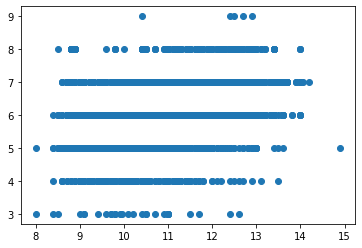

In [95]:
plt.scatter(final['alcohol'], final['quality'])
plt.show()

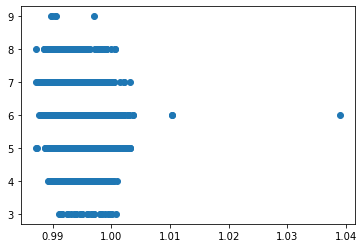

In [96]:
plt.scatter(final['density'], final['quality'])
plt.show()

### Splitting into training and testing set

In [97]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X ,y ,test_size=0.2, random_state=1)

### Standardize the features

In [98]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

### Training the model

In [99]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators = 1000)
model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=1000)

In [100]:
y_pred = model.predict(X_test)

In [101]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [102]:
print(confusion_matrix(y_test, y_pred))

[[975  53]
 [122 150]]


In [103]:
print(f"{accuracy_score(y_test, y_pred)*100} %")

86.53846153846155 %


In [104]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.95      0.92      1028
           1       0.74      0.55      0.63       272

    accuracy                           0.87      1300
   macro avg       0.81      0.75      0.77      1300
weighted avg       0.86      0.87      0.86      1300



### Plot Feature Importance

<AxesSubplot:>

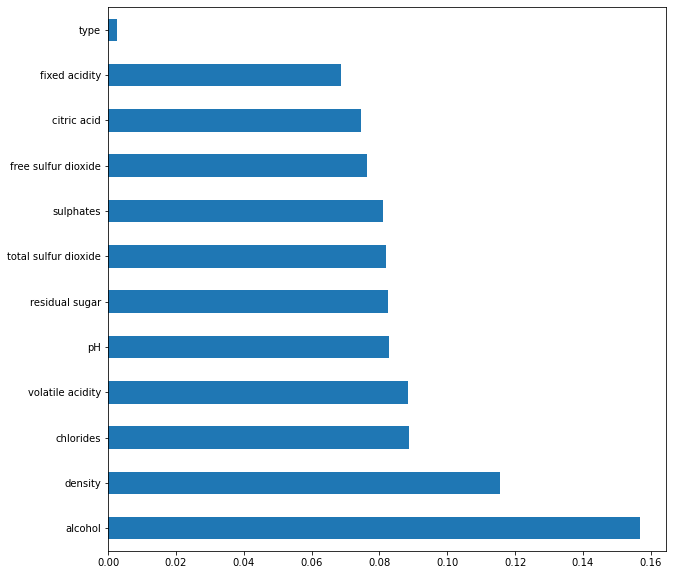

In [105]:
feat_importances = pd.Series(model.feature_importances_, index = X_features.columns)
feat_importances.nlargest(25).plot(kind='barh',figsize=(10,10))

### Filtering and describing dataset

In [110]:
df_temp = df_copy[df_copy['goodquality']==1]

In [111]:
df_temp.describe()

,fixed acidity,volatile acidity,citric acid,chlorides,free sulfur dioxide,density,alcohol,quality,goodquality
count,1277.000000,1277.000000,1277.000000,1277.000000,1277.000000,1277.000000,1277.000000,1277.000000,1277.0
mean,7.086335,0.299761,0.334628,0.044576,31.055208,0.993027,11.433359,7.158966,1.0
std,1.342605,0.290054,0.110040,0.021014,15.344154,0.003007,1.215620,0.376348,0.0
min,3.900000,0.080000,0.000000,0.012000,3.000000,0.987110,8.500000,7.000000,1.0
25%,6.300000,0.200000,0.280000,0.033000,20.000000,0.990720,10.700000,7.000000,1.0
50%,6.900000,0.270000,0.320000,0.039000,31.000000,0.992280,11.500000,7.000000,1.0
75%,7.400000,0.340000,0.380000,0.051000,40.000000,0.995000,12.400000,7.000000,1.0
max,15.600000,7.000000,0.760000,0.358000,108.000000,1.003200,14.200000,9.000000,1.0
